<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   23.10.2023
* Student: Max Hammer
* Immatriculation ID: 11153562

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [60]:
from sklearn.cluster import DBSCAN
import numpy as np
from numpy.random import randn
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

In [61]:
# hyperparameters
minPts = 2
eps = 3

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(random_data)

list(clusters).count(-1)

94

# Exercise Solution
Datasets that will be used are:
* [Iris](https://www.kaggle.com/uciml/iris)
* [Wine](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
* [Company profits](https://www.kaggle.com/datasets/tinasoni/normal-distribution-data)

In [62]:
import pandas as pd

# Load data
wine_data = pd.read_csv("./data/wine/winequality-red.csv", sep=",") # normally-distributed 
iris_data = pd.read_csv("./data/iris/Iris.csv", sep=",") # non-normally distributed
profit_data = pd.read_csv("./data/company_profits/CompanyABCProfit.csv", sep=",") # normally-distributed

In [63]:
def find_outliers(data, minPts=2, eps=3):
    outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

    clusters = outlier_detection.fit_predict(data)
    outliers = list(clusters).count(-1)
    print("Number of outliers: ", outliers)

    return clusters

Number of outliers:  54
   Year  Profit
0  1821    1645
1  1822     658
2  1823    1926
3  1824     865
4  1825     764


<Axes: xlabel='Year', ylabel='Profit'>

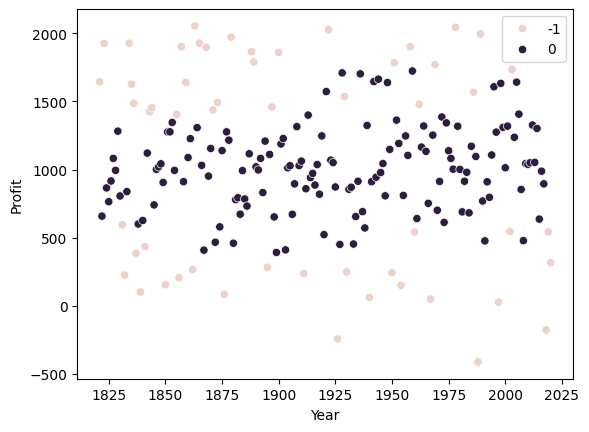

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Company profits
outliers = find_outliers(profit_data, minPts=10, eps=80)

print(profit_data.head())


# convert all values that are > -1 to 0
outliers[outliers > -1] = 0

# Scatter plot of data and outliers
sns.scatterplot(x="Year", y="Profit", data=profit_data, hue=outliers)


Number of outliers:  11
   residual sugar    pH
0             1.9  3.51
1             2.6  3.20
2             2.3  3.26
3             1.9  3.16
4             1.9  3.51


<Axes: xlabel='residual sugar', ylabel='pH'>

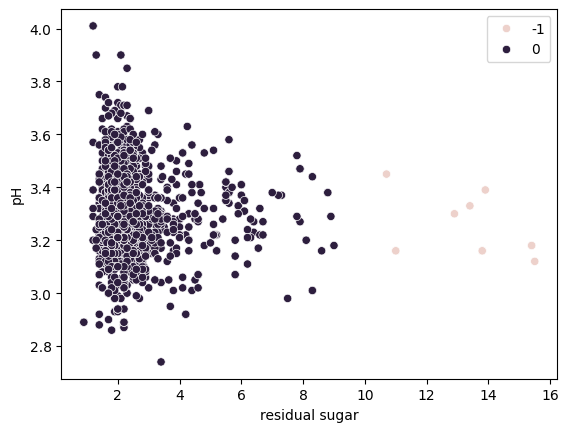

In [75]:
# Wine data
# create data with columns "residual sugar" and "pH"
data = wine_data[["residual sugar", "pH"]]
outliers = find_outliers(data, minPts=100, eps=3)

print(data.head())

# Scatter plot of data and outliers
sns.scatterplot(x="residual sugar", y="pH", data=data, hue=outliers)


Number of outliers:  0
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

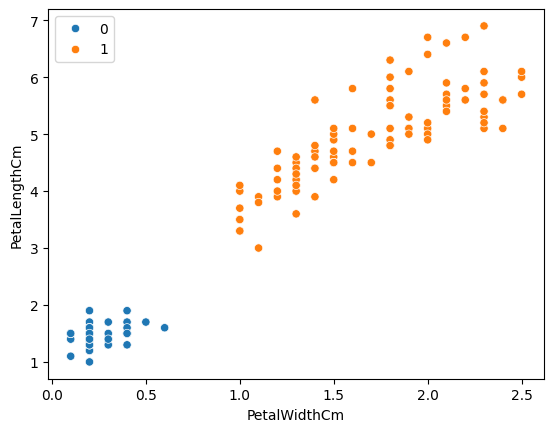

In [79]:
# Iris data
# remove Species column
data = iris_data.drop(columns=["Species"])
outliers = find_outliers(data, minPts=2, eps=3)

print(data.head())

# Scatter plot of data and outliers
sns.scatterplot(x="PetalWidthCm", y="PetalLengthCm", data=data, hue=outliers)


### Answers
**Describe your findings and interpret the results**
* Wine data:
After some fine-tuning I was able to generate a clustering for two values of the wine set. When having a pH of around 3-4 there are a group of outliers with very high residual sugar values, which is not common.
* Iris data: Even though we know that three iris species are included in the dataset. The DBScan algorithm was only able to cluster into two groups based on the width and length of the petals. It can be assumed the group of outliers may be a different species of iris.
* Company profits data: The DBScan algorithm was able to cluster the data into two groups. The first group is the majority of the data, which is the normal distribution. The second group is the outliers, which are the companies with very high profits.